# COVID-19 Symptom Prediction

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mts
data = pd.read_csv("../Data/Cleaned-Data.csv")

In [2]:
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [3]:
data.describe()
data.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


In [4]:
print(data['Severity_Mild'].value_counts())
print(data['Severity_Moderate'].value_counts())
print(data['Severity_Severe'].value_counts())

0    237600
1     79200
Name: Severity_Mild, dtype: int64
0    237600
1     79200
Name: Severity_Moderate, dtype: int64
0    237600
1     79200
Name: Severity_Severe, dtype: int64


In [5]:
# data['Severity'] = 0
# data['Severity']=np.where(data["Severity_Mild"] == 1,1,data['Severity'])
# data['Severity']=np.where(data["Severity_Moderate"] == 1,2,data['Severity'])
# data['Severity']=np.where(data["Severity_Severe"] == 1,3,data['Severity'])

In [6]:
data.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


In [7]:
data['Severity_Mild'][5]

0

In [8]:
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [9]:
data['Country'].value_counts()

UAE                   31680
Other-EUR             31680
Spain                 31680
France                31680
Iran                  31680
Other                 31680
Republic of Korean    31680
Italy                 31680
China                 31680
Germany               31680
Name: Country, dtype: int64

In [10]:
data_map = {'UAE':0, 'Spain':1, 'Republic of Korean' : 2, 'Other-EUR':3, 'Other':4, 'Italy':5,'Iran':6, 'Germany':7, 'France':8, 'China':9}
data['Country'] = data['Country'].map(data_map)


In [11]:
data['Country']

0         9
1         9
2         9
3         9
4         9
         ..
316795    4
316796    4
316797    4
316798    4
316799    4
Name: Country, Length: 316800, dtype: int64

In [12]:
#data['Gender'] = 0
#data['Gender']=np.where(data["Gender_Male"] == 1,1,data['Gender'])
#data['Gender']=np.where(data["Gender_Transgender"] == 1,2,data['Gender'])
#data['Contact'] = 0
#data['Contact']=np.where(data["Contact_Yes"] == 1,2,data['Contact'])
data['Age'] = 0
data['Age']=np.where(data['Age_0-9'] == 1, 0, data['Age'])
data['Age']=np.where(data['Age_10-19'] == 1, 1, data['Age'])
data['Age']=np.where(data['Age_20-24'] == 1, 2, data['Age'])
data['Age']=np.where(data['Age_25-59'] == 1, 3, data['Age'])
data['Age']=np.where(data['Age_60+'] == 1, 4, data['Age'])
#data.drop(['Gender_Male', 'Gender_Female', 'Gender_Transgender', 'Severity_None', 'Severity_Mild', 'Severity_Moderate', 'Severity_Severe', 'Contact_No', 'Contact_Yes', 'Contact_Dont-Know', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+'], axis=1, inplace = True)
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Age
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,1,9,0
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,9,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,9,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,1,9,0
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,9,0


<AxesSubplot:>

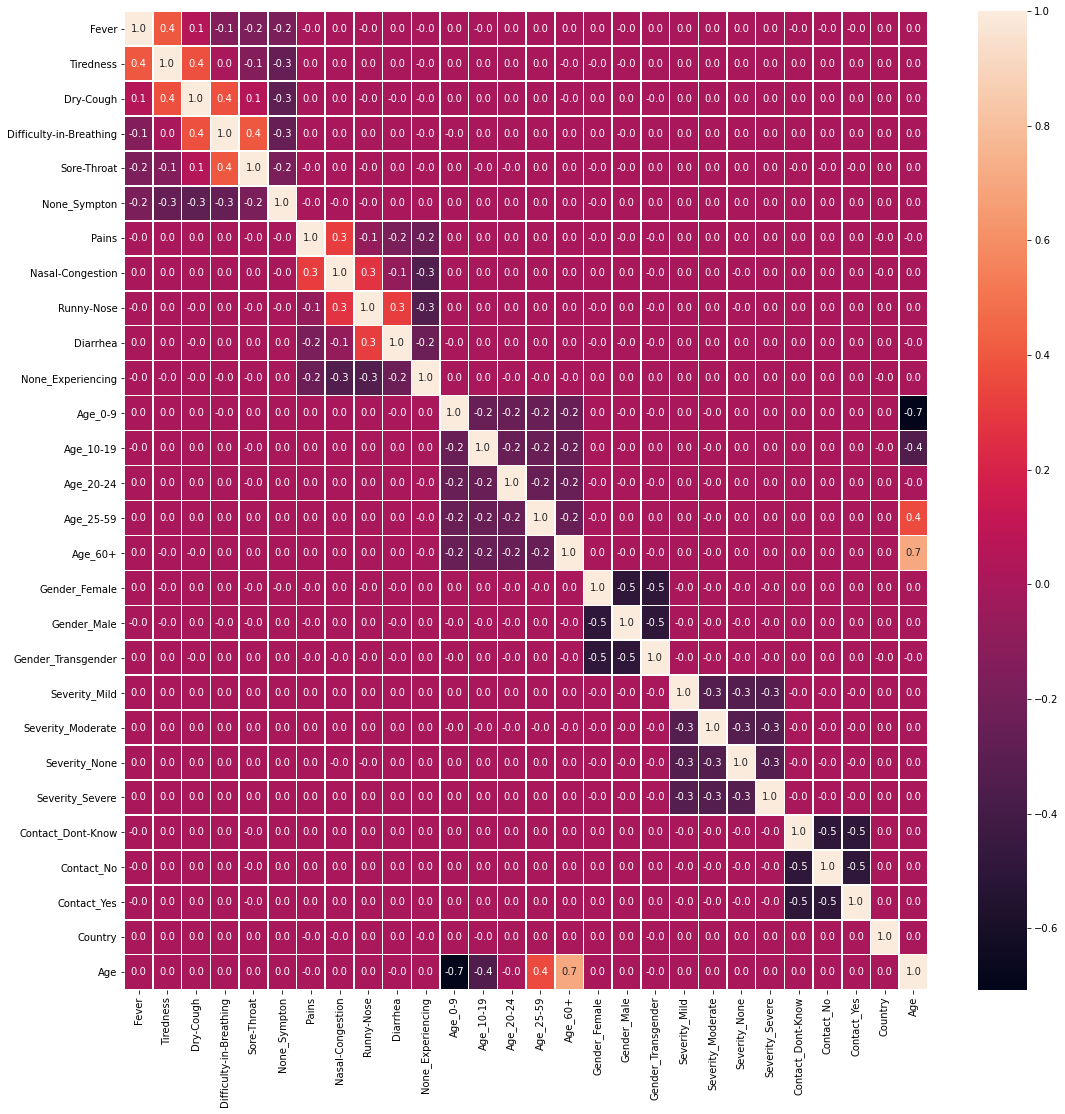

In [13]:
#data['Symptom'] = data['Fever'] + data['Tiredness'] + data['Dry-Cough'] + data['Difficulty-in-Breathing'] + data['Sore-Throat'] 
#+ data['Pains'] + data['Nasal-Congestion'] + data['Runny-Nose'] + data['Diarrhea']
#data.drop(['Symptom'], axis=1, inplace = True)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [14]:

features = data[['Fever', 'Tiredness', 'Dry-Cough', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'Gender_Male', 'Gender_Female', 'Contact_Yes', 'Contact_Dont-Know', 'Age']]
ind = data['Severity_None']
X_train, X_TV, y_train, y_TV = tts.train_test_split(features, ind, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = tts.train_test_split(X_TV, y_TV, test_size=0.5, random_state=42)

In [15]:
def print_results(results):
     print('BEST PARAMS: {}\n'.format(results.best_params_))
     means = results.cv_results_['mean_test_score']
     stds = results.cv_results_['std_test_score']
     for mean, std, params, in zip(means, stds, results.cv_results_['params']):
          print('{} (+/-{}) for {}'.format(round(mean, 3), round(std*2, 3), params))

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rf.predict(X_val)
accuracy = mts.accuracy_score(y_val, y_pred)
print(accuracy)

0.7502367424242424


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_predSVC = svc.predict(X_val)
accuracySVC = mts.accuracy_score(y_val, y_predSVC)
print(accuracySVC)

In [19]:
rfh = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}
cv = tts.GridSearchCV(rf, parameters, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 20, None],
                         'n_estimators': [5, 50, 100]})

In [20]:
print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 5}

0.749 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}
0.749 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}
0.749 (+/-0.0) for {'max_depth': 2, 'n_estimators': 100}
0.749 (+/-0.0) for {'max_depth': 10, 'n_estimators': 5}
0.749 (+/-0.0) for {'max_depth': 10, 'n_estimators': 50}
0.749 (+/-0.0) for {'max_depth': 10, 'n_estimators': 100}
0.749 (+/-0.0) for {'max_depth': 20, 'n_estimators': 5}
0.749 (+/-0.0) for {'max_depth': 20, 'n_estimators': 50}
0.749 (+/-0.0) for {'max_depth': 20, 'n_estimators': 100}
0.749 (+/-0.001) for {'max_depth': None, 'n_estimators': 5}
0.749 (+/-0.0) for {'max_depth': None, 'n_estimators': 50}
0.749 (+/-0.0) for {'max_depth': None, 'n_estimators': 100}


In [21]:
rfa = RandomForestClassifier(max_depth=2, n_estimators=5)
rfa.fit(X_train, y_train)
rfb = RandomForestClassifier(max_depth=2, n_estimators=50)
rfb.fit(X_train, y_train)
rfc = RandomForestClassifier(max_depth=2, n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=2)

In [22]:
for mdl in [rfa, rfb, rfc]:
    y_pred = mdl.predict(X_val)
    accuracy = round(mts.accuracy_score(y_val, y_pred), 3)
    precision = round(mts.precision_score(y_val, y_pred), 3)
    recall = round(mts.recall_score(y_val, y_pred), 3)
    print("MAX_DEPTH: {}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX_DEPTH: {}
MAX_DEPTH: {}
MAX_DEPTH: {}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
rgs = LogisticRegression()
rgs.fit(X_train, y_train)
y_predRGS = rgs.predict(X_val)
accuracyRGS = mts.accuracy_score(y_val, y_predRGS)

In [25]:
print(accuracyRGS)

0.7502367424242424
